In [1]:
## IMPORTS ##
import numpy as np
from astropy.io import fits

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
maps = fits.open("files/fitres_pixbin_fluxmap.fits") #i had to remove this file because it was too large to push to github
gal_region = maps['galaxy_region'].data
rows, cols = np.where(gal_region != 1)

#(pixel size) / (focal length) * 206.265 "/deg
kpc_per_pix = ((0.000024) / (2.939) * 206.265) #24 microns, 2939 mm

map_prop_SM = np.log10(np.power(10.0, maps['pix-log_mass-p50'].data) / kpc_per_pix**2)
map_prop_SM[rows, cols] = np.nan

map_SFR = np.log10(np.power(10.0, maps['pix-log_sfr-p50'].data) / kpc_per_pix**2)
map_SFR[rows, cols] = np.nan

map_Av = 1.086 * maps['bin-dust2-p50'].data
map_Av[rows, cols] = np.nan

map_logzsol = maps['bin-logzsol-p50'].data
map_logzsol[rows, cols] = np.nan

map_mw_age = np.power(10.0, maps['bin-log_mw_age-p50'].data)
map_mw_age[rows, cols] = np.nan

In [3]:
#Define base and target sizes
base_figsize = (6, 6)
base_fontsize = 12
figsize = (9, 9)

scale_x = figsize[0] / base_figsize[0]
scale_y = figsize[1] / base_figsize[1]
scale = (scale_x + scale_y) / 2

#Plot dictionary (same as before)
maps_to_plot = {
    "SFR_surface_density": {
        "data": map_SFR,
        "cmap": "CMRmap",
        "vmin": -9.0,
        "vmax": -5.5,
        "cbarlabel": r"log($\Sigma{SFR}[M_{\odot}\rm{yr}^{-1}\rm{kpc}^{-2}]$)"
    },
    "Stellar_mass_surface_density": {
        "data": map_prop_SM,
        "cmap": "CMRmap",
        "vmin": 1.25,
        "vmax": 3.25,
        "cbarlabel": r"log($\Sigma{*}[M_{\odot}\rm{kpc}^{-2}]$)"
    },
    "Dust_attenuation": {
        "data": map_Av,
        "cmap": "inferno",
        "vmin": 0,
        "vmax": 0.6,
        "cbarlabel": r"$A{V}$ [mag]"
    },
    "Mass_weighted_age": {
        "data": map_mw_age,
        "cmap": "inferno",
        "vmin": 0,
        "vmax": 0.45,
        "cbar_label": "Mass-weighted age [Gyr]"
    },
    "Stellar_metallicity": {
        "data": map_logzsol,
        "cmap": "inferno",
        "vmin": -2.0,
        "vmax": 0.5,
        "cbarlabel": r"log($Z/Z{\odot}$)"
    }
}

AttributeError: 'Axes' object has no attribute 'settitle'

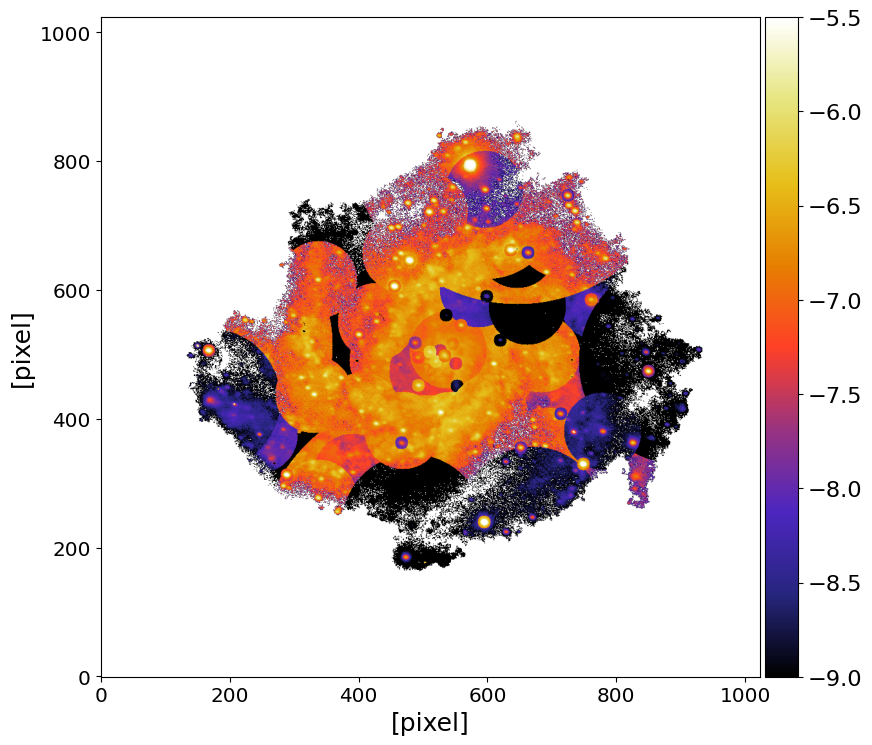

In [4]:
#Generate scaled plots
for name, props in maps_to_plot.items():
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(props["data"], origin='lower', cmap=props["cmap"],
                   vmin=props["vmin"], vmax=props["vmax"])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb = plt.colorbar(im, cax=cax)
    #cb.set_label(props["cbar_label"], fontsize=base_fontsize * scale)
    cb.ax.tick_params(labelsize=base_fontsize * scale * 0.9)

    ax.set_xlabel('[pixel]', fontsize=base_fontsize * scale)
    ax.set_ylabel('[pixel]', fontsize=base_fontsize * scale)
    ax.tick_params(labelsize=base_fontsize * scale * 0.8)

    ax.settitle(name.replace("", " "), fontsize=base_fontsize * scale * 1.2, loc='center')
    plt.tight_layout()
    plt.savefig(f"{name}.png")
    plt.show()
    plt.close()